# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
set_number = 1
record_number = 1
# city_weather_df

print("Beginning Data Retrieval")     
print("-----------------------------")

city_weather_df = pd.DataFrame({
    "City":cities, 
    "Lat":"",
    "Lng":"",
    "Max Temp":"",
    "Humidity":"",
    "Cloudiness":"",
    "Wind Speed":"",
    "Country":"",
    "Date":""
})
city_weather_df

base_url = "https://api.openweathermap.org/data/2.5/weather"
params = {"appid": weather_api_key,
          "units":"imperial"}

for index, row in city_weather_df.iterrows():
    try: 
        city = row ["City"]
        params ["q"] = city
        print(f"Processing Record {record_number} of Set {set_number} | {city}")
        city_weather_data = requests.get(base_url, params = params).json()
        print(city_weather_data)
        city_weather_df.loc[index, "Lng"] = city_weather_data["coord"]["lon"]
        city_weather_df.loc[index, "Lat"] = city_weather_data["coord"]["lat"]
        city_weather_df.loc[index, "Max Temp"] = city_weather_data["main"]["temp_max"]
        city_weather_df.loc[index, "Humidity"] = city_weather_data["main"]["humidity"]
        city_weather_df.loc[index, "Cloudiness"] = city_weather_data["clouds"]["all"]
        city_weather_df.loc[index, "Wind Speed"] = city_weather_data["wind"]["speed"]
        city_weather_df.loc[index, "Country"] = city_weather_data["sys"]["country"]
        city_weather_df.loc[index, "Date"] = city_weather_data["dt"]
    except: 
        print("City not found. Skipping...")
        record_number = record_number + 1
        if record_number == 51:
            record_number = 1
            set_number = set_number + 1

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | ushuaia
{'coord': {'lon': -68.3, 'lat': -54.8}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 48.2, 'feels_like': 35.22, 'temp_min': 48.2, 'temp_max': 48.2, 'pressure': 982, 'humidity': 39}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 320, 'gust': 29.97}, 'clouds': {'all': 20}, 'dt': 1603767687, 'sys': {'type': 1, 'id': 8303, 'country': 'AR', 'sunrise': 1603788854, 'sunset': 1603841976}, 'timezone': -10800, 'id': 3833367, 'name': 'Ushuaia', 'cod': 200}
Processing Record 1 of Set 1 | hilo
{'coord': {'lon': -155.09, 'lat': 19.73}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 73.09, 'feels_like': 75.22, 'temp_min': 69.01, 'temp_max': 75.99, 'pressure': 1015, 'humidi

Processing Record 1 of Set 1 | dehloran
{'coord': {'lon': 47.27, 'lat': 32.69}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 67.03, 'feels_like': 60.53, 'temp_min': 67.03, 'temp_max': 67.03, 'pressure': 1016, 'humidity': 24, 'sea_level': 1016, 'grnd_level': 990}, 'visibility': 10000, 'wind': {'speed': 4.45, 'deg': 33}, 'clouds': {'all': 0}, 'dt': 1603767797, 'sys': {'country': 'IR', 'sunrise': 1603767861, 'sunset': 1603807498}, 'timezone': 12600, 'id': 136702, 'name': 'Dehlorān', 'cod': 200}
Processing Record 1 of Set 1 | dosso
{'coord': {'lon': 3.19, 'lat': 13.05}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 73.96, 'feels_like': 70.25, 'temp_min': 73.96, 'temp_max': 73.96, 'pressure': 1009, 'humidity': 28, 'sea_level': 1009, 'grnd_level': 984}, 'visibility': 10000, 'wind': {'speed': 2.21, 'deg': 124}, 'clouds': {'all': 0}, 'dt': 1

Processing Record 6 of Set 1 | mecca
{'coord': {'lon': 39.83, 'lat': 21.43}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 72.72, 'feels_like': 76.55, 'temp_min': 72.72, 'temp_max': 72.72, 'pressure': 1012, 'humidity': 72, 'sea_level': 1012, 'grnd_level': 975}, 'visibility': 10000, 'wind': {'speed': 1.19, 'deg': 34}, 'clouds': {'all': 0}, 'dt': 1603767725, 'sys': {'country': 'SA', 'sunrise': 1603768882, 'sunset': 1603810048}, 'timezone': 10800, 'id': 104515, 'name': 'Makkah al Mukarramah', 'cod': 200}
Processing Record 6 of Set 1 | doha
{'coord': {'lon': 51.53, 'lat': 25.29}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 76.1, 'feels_like': 78.82, 'temp_min': 73.99, 'temp_max': 78.8, 'pressure': 1014, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 310}, 'clouds': {'all': 0}, 'dt': 1603767482, 'sys': {'type': 1, 'i

{'coord': {'lon': -90.35, 'lat': -0.74}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 68, 'feels_like': 72.99, 'temp_min': 68, 'temp_max': 68, 'pressure': 1014, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 1.01, 'deg': 158, 'gust': 3}, 'clouds': {'all': 54}, 'dt': 1603767809, 'sys': {'type': 3, 'id': 2005652, 'country': 'EC', 'sunrise': 1603712467, 'sunset': 1603756155}, 'timezone': -21600, 'id': 3652764, 'name': 'Puerto Ayora', 'cod': 200}
Processing Record 7 of Set 1 | mazagao
{'coord': {'lon': -51.29, 'lat': -0.12}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 84.2, 'feels_like': 88.56, 'temp_min': 84.2, 'temp_max': 84.2, 'pressure': 1010, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 50}, 'clouds': {'all': 20}, 'dt': 1603767647, 'sys': {'type': 1, 'id': 8415, 'country': 'BR', 'sunrise': 

{'coord': {'lon': 150.86, 'lat': -34.58}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 63.64, 'feels_like': 57.18, 'temp_min': 60.8, 'temp_max': 66.99, 'pressure': 1020, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 170}, 'clouds': {'all': 75}, 'dt': 1603767385, 'sys': {'type': 1, 'id': 9594, 'country': 'AU', 'sunrise': 1603738806, 'sunset': 1603786832}, 'timezone': 39600, 'id': 6255012, 'name': 'Flinders', 'cod': 200}
Processing Record 8 of Set 1 | palabuhanratu
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 9 of Set 1 | berlevag
{'coord': {'lon': 29.09, 'lat': 70.86}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 37.99, 'feels_like': 26.19, 'temp_min': 37.99, 'temp_max': 37.99, 'pressure': 998, 'humidity': 78, 'sea_level': 998, 'grnd_level': 998}, 'visibility':

{'coord': {'lon': 17.94, 'lat': -33.01}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 59, 'feels_like': 57.33, 'temp_min': 59, 'temp_max': 59, 'pressure': 1010, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 40}, 'clouds': {'all': 9}, 'dt': 1603767415, 'sys': {'type': 1, 'id': 1943, 'country': 'ZA', 'sunrise': 1603770815, 'sunset': 1603818621}, 'timezone': 7200, 'id': 3361934, 'name': 'Saldanha', 'cod': 200}
Processing Record 12 of Set 1 | jiancheng
{'coord': {'lon': 104.55, 'lat': 30.39}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 63.16, 'feels_like': 61.81, 'temp_min': 59, 'temp_max': 64.99, 'pressure': 1021, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 8.95, 'deg': 20}, 'clouds': {'all': 40}, 'dt': 1603767816, 'sys': {'type': 1, 'id': 9674, 'country': 'CN', 'sunrise': 1603753937, 'sunset

{'coord': {'lon': -159.78, 'lat': -21.21}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 71.6, 'feels_like': 71.6, 'temp_min': 71.6, 'temp_max': 71.6, 'pressure': 1010, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 130, 'gust': 21.92}, 'rain': {'1h': 1.83}, 'clouds': {'all': 100}, 'dt': 1603767702, 'sys': {'type': 1, 'id': 7271, 'country': 'CK', 'sunrise': 1603727945, 'sunset': 1603774002}, 'timezone': -36000, 'id': 4035715, 'name': 'Avarua', 'cod': 200}
Processing Record 13 of Set 1 | keti bandar
{'coord': {'lon': 67.45, 'lat': 24.14}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 80.31, 'feels_like': 79.88, 'temp_min': 80.31, 'temp_max': 80.31, 'pressure': 1014, 'humidity': 56, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 8.77, 'deg': 314}, 'clouds': {'all': 0}, 'dt': 1603

{'coord': {'lon': -17.03, 'lat': 20.93}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 75.2, 'feels_like': 68.27, 'temp_min': 75.2, 'temp_max': 75.2, 'pressure': 1013, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 18.34, 'deg': 30}, 'clouds': {'all': 0}, 'dt': 1603767823, 'sys': {'type': 1, 'id': 2444, 'country': 'MR', 'sunrise': 1603782502, 'sunset': 1603823719}, 'timezone': 0, 'id': 2377457, 'name': 'Nouadhibou', 'cod': 200}
Processing Record 13 of Set 1 | kahului
{'coord': {'lon': -156.47, 'lat': 20.89}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 80.78, 'feels_like': 80.71, 'temp_min': 78.01, 'temp_max': 87.8, 'pressure': 1014, 'humidity': 52}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 10}, 'clouds': {'all': 40}, 'dt': 1603767634, 'sys': {'type': 1, 'id': 7879, 'country': 'US', 'sunrise': 1603729548, 

{'coord': {'lon': 121.9, 'lat': -33.87}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 77, 'feels_like': 75.97, 'temp_min': 77, 'temp_max': 77, 'pressure': 1012, 'humidity': 47}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 250}, 'clouds': {'all': 0}, 'dt': 1603767725, 'sys': {'type': 1, 'id': 9525, 'country': 'AU', 'sunrise': 1603745811, 'sunset': 1603793727}, 'timezone': 28800, 'id': 2071860, 'name': 'Esperance', 'cod': 200}
Processing Record 13 of Set 1 | northam
{'coord': {'lon': -4.22, 'lat': 51.03}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 47.5, 'feels_like': 40.64, 'temp_min': 46.99, 'temp_max': 48, 'pressure': 1000, 'humidity': 90}, 'visibility': 10000, 'wind': {'speed': 10, 'deg': 205, 'gust': 18.01}, 'rain': {'1h': 2.44}, 'clouds': {'all': 100}, 'dt': 1603767826, 'sys': {'type': 3, 'id': 2005965, 'country': 'GB

{'coord': {'lon': 147.06, 'lat': -42.78}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 56.43, 'feels_like': 51.01, 'temp_min': 54, 'temp_max': 59, 'pressure': 1030, 'humidity': 50}, 'visibility': 10000, 'wind': {'speed': 5.01, 'deg': 41, 'gust': 8.01}, 'clouds': {'all': 75}, 'dt': 1603767829, 'sys': {'type': 3, 'id': 2031307, 'country': 'AU', 'sunrise': 1603738934, 'sunset': 1603788528}, 'timezone': 39600, 'id': 2155415, 'name': 'New Norfolk', 'cod': 200}
Processing Record 15 of Set 1 | eskasem
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 16 of Set 1 | tommot
{'coord': {'lon': 126.29, 'lat': 58.96}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 19.09, 'feels_like': 10.56, 'temp_min': 19.09, 'temp_max': 19.09, 'pressure': 1026, 'humidity': 92, 'sea_level': 1026, 'grnd_level': 98

{'coord': {'lon': -110.7, 'lat': 35.02}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 32, 'feels_like': 18.97, 'temp_min': 32, 'temp_max': 32, 'pressure': 1017, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 310}, 'clouds': {'all': 75}, 'dt': 1603767832, 'sys': {'type': 1, 'id': 4534, 'country': 'US', 'sunrise': 1603719523, 'sunset': 1603758867}, 'timezone': -25200, 'id': 5321473, 'name': 'Winslow', 'cod': 200}
Processing Record 16 of Set 1 | smoky lake
{'coord': {'lon': -112.47, 'lat': 54.12}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 35.01, 'feels_like': 28.99, 'temp_min': 35.01, 'temp_max': 35.01, 'pressure': 1006, 'humidity': 98}, 'visibility': 181, 'wind': {'speed': 5.01, 'deg': 203, 'gust': 8.99}, 'rain': {'1h': 0.59}, 'clouds': {'all': 100}, 'dt': 1603767832, 'sys': {'type': 3, 'id': 2001306, 'c

{'coord': {'lon': 93.28, 'lat': 57.7}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 31.69, 'feels_like': 24.62, 'temp_min': 31.69, 'temp_max': 31.69, 'pressure': 1017, 'humidity': 98, 'sea_level': 1017, 'grnd_level': 1005}, 'visibility': 1251, 'wind': {'speed': 6.02, 'deg': 70}, 'rain': {'1h': 0.24}, 'clouds': {'all': 100}, 'dt': 1603767835, 'sys': {'country': 'RU', 'sunrise': 1603759704, 'sunset': 1603793571}, 'timezone': 25200, 'id': 1504075, 'name': 'Kazachinskoye', 'cod': 200}
Processing Record 17 of Set 1 | sao joao da barra
{'coord': {'lon': -41.05, 'lat': -21.64}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 71.17, 'feels_like': 74.66, 'temp_min': 71.17, 'temp_max': 71.17, 'pressure': 1010, 'humidity': 89, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 5.39, 'deg': 183}, 'clouds': {'all'

{'coord': {'lon': 57.52, 'lat': -20.52}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 71.6, 'feels_like': 72.72, 'temp_min': 71.6, 'temp_max': 71.6, 'pressure': 1017, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 80}, 'clouds': {'all': 40}, 'dt': 1603767666, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1603762222, 'sunset': 1603808217}, 'timezone': 14400, 'id': 933995, 'name': 'Souillac', 'cod': 200}
Processing Record 20 of Set 1 | talara
{'coord': {'lon': -81.27, 'lat': -4.58}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 64.71, 'feels_like': 61.54, 'temp_min': 64.71, 'temp_max': 64.71, 'pressure': 1014, 'humidity': 90, 'sea_level': 1014, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 12.59, 'deg': 174}, 'clouds': {'all': 49}, 'dt': 1603767838, 'sys': {'country': 'PE

Processing Record 20 of Set 1 | nadym
{'coord': {'lon': 72.52, 'lat': 65.53}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 4.96, 'feels_like': -6.2, 'temp_min': 4.96, 'temp_max': 4.96, 'pressure': 1028, 'humidity': 94, 'sea_level': 1028, 'grnd_level': 1026}, 'visibility': 10000, 'wind': {'speed': 8.93, 'deg': 60}, 'clouds': {'all': 0}, 'dt': 1603767841, 'sys': {'country': 'RU', 'sunrise': 1603766685, 'sunset': 1603796554}, 'timezone': 18000, 'id': 1498087, 'name': 'Nadym', 'cod': 200}
Processing Record 20 of Set 1 | halifax
{'coord': {'lon': -63.57, 'lat': 44.65}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 49.1, 'feels_like': 46.54, 'temp_min': 48, 'temp_max': 50, 'pressure': 1019, 'humidity': 98}, 'visibility': 10000, 'wind': {'speed': 4, 'deg': 111, 'gust': 11.99}, 'clouds': {'all': 100}, 'dt': 1603767793, 'sys': {'type':

{'coord': {'lon': 21.88, 'lat': 48.06}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 51.8, 'feels_like': 48.09, 'temp_min': 51.8, 'temp_max': 51.8, 'pressure': 1012, 'humidity': 87}, 'visibility': 9000, 'wind': {'speed': 5.82, 'deg': 110}, 'clouds': {'all': 22}, 'dt': 1603767845, 'sys': {'type': 1, 'id': 6665, 'country': 'HU', 'sunrise': 1603775405, 'sunset': 1603812140}, 'timezone': 3600, 'id': 716943, 'name': 'Nyírbogdány', 'cod': 200}
Processing Record 22 of Set 1 | natal
{'coord': {'lon': -35.21, 'lat': -5.79}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.86, 'feels_like': 85.77, 'temp_min': 77, 'temp_max': 78.8, 'pressure': 1012, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 90}, 'clouds': {'all': 75}, 'dt': 1603767845, 'sys': {'type': 1, 'id': 8417, 'country': 'BR', 'sunrise': 1603785347, 'suns

{'coord': {'lon': 25.57, 'lat': -33.92}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 64.4, 'feels_like': 59.5, 'temp_min': 64.4, 'temp_max': 64.4, 'pressure': 1010, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 70}, 'clouds': {'all': 90}, 'dt': 1603767666, 'sys': {'type': 1, 'id': 1973, 'country': 'ZA', 'sunrise': 1603768909, 'sunset': 1603816865}, 'timezone': 7200, 'id': 964420, 'name': 'Port Elizabeth', 'cod': 200}
Processing Record 23 of Set 1 | victoria
{'coord': {'lon': 114.16, 'lat': 22.29}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 76.98, 'feels_like': 79.72, 'temp_min': 69.01, 'temp_max': 80.01, 'pressure': 1013, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 26, 'gust': 8.99}, 'clouds': {'all': 21}, 'dt': 1603767613, 'sys': {'type': 3, 'id': 2035800, 'country': 'HK'

{'coord': {'lon': 96.11, 'lat': 52.47}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 32.18, 'feels_like': 26.49, 'temp_min': 32.18, 'temp_max': 32.18, 'pressure': 1027, 'humidity': 82, 'sea_level': 1027, 'grnd_level': 917}, 'visibility': 10000, 'wind': {'speed': 2.64, 'deg': 109}, 'clouds': {'all': 80}, 'dt': 1603767852, 'sys': {'country': 'RU', 'sunrise': 1603758152, 'sunset': 1603793765}, 'timezone': 25200, 'id': 1489401, 'name': 'Toora-Khem', 'cod': 200}
Processing Record 25 of Set 1 | leningradskiy
{'coord': {'lon': 178.42, 'lat': 69.38}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24.82, 'feels_like': 11.44, 'temp_min': 24.82, 'temp_max': 24.82, 'pressure': 1017, 'humidity': 93, 'sea_level': 1017, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 15.43, 'deg': 286}, 'clouds': {'all': 100}, 'dt': 160376766

{'coord': {'lon': 14.51, 'lat': -22.96}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 54.77, 'feels_like': 53.6, 'temp_min': 53.6, 'temp_max': 55.99, 'pressure': 1013, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 10}, 'clouds': {'all': 0}, 'dt': 1603767765, 'sys': {'type': 1, 'id': 2288, 'country': 'NA', 'sunrise': 1603772380, 'sunset': 1603818703}, 'timezone': 7200, 'id': 3359638, 'name': 'Walvis Bay', 'cod': 200}
Processing Record 25 of Set 1 | umm kaddadah
{'coord': {'lon': 26.69, 'lat': 13.6}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.21, 'feels_like': 67.57, 'temp_min': 78.21, 'temp_max': 78.21, 'pressure': 1010, 'humidity': 24, 'sea_level': 1010, 'grnd_level': 943}, 'visibility': 10000, 'wind': {'speed': 14.41, 'deg': 21}, 'clouds': {'all': 0}, 'dt': 1603767859, 'sys': {'country': 'SD', 'sunrise':

{'coord': {'lon': -149.33, 'lat': -17.53}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 80.29, 'feels_like': 83.61, 'temp_min': 80.01, 'temp_max': 80.6, 'pressure': 1011, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 50}, 'clouds': {'all': 40}, 'dt': 1603767756, 'sys': {'type': 1, 'id': 7318, 'country': 'PF', 'sunrise': 1603725668, 'sunset': 1603771263}, 'timezone': -36000, 'id': 4033356, 'name': 'Tiarei', 'cod': 200}
Processing Record 26 of Set 1 | puerto cabezas
{'coord': {'lon': -83.39, 'lat': 14.04}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.75, 'feels_like': 86.34, 'temp_min': 78.75, 'temp_max': 78.75, 'pressure': 1011, 'humidity': 87, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 4.43, 'deg': 168}, 'clouds': {'all': 100}, 'dt': 1603767863, 'sys': {'country'

{'coord': {'lon': 128.18, 'lat': -3.7}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 89.6, 'feels_like': 95.94, 'temp_min': 89.6, 'temp_max': 89.6, 'pressure': 1009, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 180}, 'clouds': {'all': 40}, 'dt': 1603767867, 'sys': {'type': 1, 'id': 9361, 'country': 'ID', 'sunrise': 1603746255, 'sunset': 1603790269}, 'timezone': 32400, 'id': 1651531, 'name': 'Ambon City', 'cod': 200}
Processing Record 29 of Set 1 | andros town
{'coord': {'lon': -77.77, 'lat': 24.7}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 87.49, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1018, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 1.12, 'deg': 0}, 'clouds': {'all': 75}, 'dt': 1603767616, 'sys': {'type': 1, 'id': 7269, 'country': 'BS', 'sunrise': 1603

{'coord': {'lon': 45.47, 'lat': -19.52}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 77.43, 'feels_like': 82.09, 'temp_min': 77.43, 'temp_max': 77.43, 'pressure': 1015, 'humidity': 64, 'sea_level': 1015, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 0.56, 'deg': 204}, 'clouds': {'all': 13}, 'dt': 1603767871, 'sys': {'country': 'MG', 'sunrise': 1603765177, 'sunset': 1603811046}, 'timezone': 10800, 'id': 1059051, 'name': 'Miandrivazo', 'cod': 200}
Processing Record 30 of Set 1 | viedma
{'coord': {'lon': -63, 'lat': -40.81}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 66.13, 'feels_like': 58.68, 'temp_min': 66.13, 'temp_max': 66.13, 'pressure': 1004, 'humidity': 26, 'sea_level': 1004, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 6.44, 'deg': 272}, 'clouds': {'all': 100}, 'dt': 1603767640, 'sys': 

{'coord': {'lon': 143.17, 'lat': 51.83}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 42.84, 'feels_like': 33.24, 'temp_min': 42.84, 'temp_max': 42.84, 'pressure': 1018, 'humidity': 73, 'sea_level': 1018, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 11.45, 'deg': 331}, 'rain': {'1h': 0.11}, 'clouds': {'all': 99}, 'dt': 1603767874, 'sys': {'country': 'RU', 'sunrise': 1603746752, 'sunset': 1603782577}, 'timezone': 39600, 'id': 2122783, 'name': 'Nogliki', 'cod': 200}
Processing Record 31 of Set 1 | charleston
{'coord': {'lon': -79.93, 'lat': 32.78}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 65.44, 'feels_like': 66.13, 'temp_min': 64.4, 'temp_max': 66.99, 'pressure': 1021, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 60}, 'clouds': {'all': 40}, 'dt': 1603767613, 'sys': {'type': 1, 'id': 

{'coord': {'lon': 0.57, 'lat': 50.86}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 46.56, 'feels_like': 39.76, 'temp_min': 45, 'temp_max': 48.2, 'pressure': 1002, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 250}, 'clouds': {'all': 3}, 'dt': 1603767878, 'sys': {'type': 1, 'id': 1420, 'country': 'GB', 'sunrise': 1603780884, 'sunset': 1603816890}, 'timezone': 0, 'id': 2647356, 'name': 'Hastings', 'cod': 200}
Processing Record 33 of Set 1 | thunder bay
{'coord': {'lon': -89.32, 'lat': 48.4}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.22, 'feels_like': 20.05, 'temp_min': 28, 'temp_max': 28.4, 'pressure': 1025, 'humidity': 54}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 240}, 'clouds': {'all': 90}, 'dt': 1603767602, 'sys': {'type': 1, 'id': 906, 'country': 'CA', 'sunrise': 1603715670, 'sunset'

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 34 of Set 1 | natalio
{'coord': {'lon': -55.08, 'lat': -26.72}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 60.87, 'feels_like': 62.17, 'temp_min': 60.87, 'temp_max': 60.87, 'pressure': 1010, 'humidity': 99, 'sea_level': 1010, 'grnd_level': 984}, 'visibility': 10000, 'wind': {'speed': 3.91, 'deg': 225}, 'clouds': {'all': 12}, 'dt': 1603767881, 'sys': {'country': 'PY', 'sunrise': 1603788812, 'sunset': 1603835672}, 'timezone': -10800, 'id': 3437681, 'name': 'Natalio', 'cod': 200}
Processing Record 34 of Set 1 | jalu
{'coord': {'lon': 21.55, 'lat': 29.03}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 65.03, 'feels_like': 63.32, 'temp_min': 65.03, 'temp_max': 65.03, 'pressure': 1015, 'humidity': 62, 'sea_level': 1015, 'grnd_level': 1010}, 'visib

{'coord': {'lon': -72.42, 'lat': -35.33}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 49.84, 'feels_like': 43.39, 'temp_min': 49.84, 'temp_max': 49.84, 'pressure': 1017, 'humidity': 84, 'sea_level': 1017, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 9.44, 'deg': 200}, 'clouds': {'all': 100}, 'dt': 1603767694, 'sys': {'country': 'CL', 'sunrise': 1603792288, 'sunset': 1603840518}, 'timezone': -10800, 'id': 3893726, 'name': 'Constitución', 'cod': 200}
Processing Record 34 of Set 1 | richards bay
{'coord': {'lon': 32.04, 'lat': -28.78}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 66.11, 'feels_like': 67.89, 'temp_min': 66.11, 'temp_max': 66.11, 'pressure': 1015, 'humidity': 88, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 4.32, 'deg': 57}, 'clouds': {'all': 100}, 'dt': 160

{'coord': {'lon': 27.46, 'lat': -17.26}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 76.96, 'feels_like': 75.83, 'temp_min': 76.96, 'temp_max': 76.96, 'pressure': 1011, 'humidity': 52, 'sea_level': 1011, 'grnd_level': 956}, 'visibility': 10000, 'wind': {'speed': 6.53, 'deg': 19}, 'clouds': {'all': 0}, 'dt': 1603767888, 'sys': {'country': 'ZM', 'sunrise': 1603769639, 'sunset': 1603815228}, 'timezone': 7200, 'id': 897456, 'name': 'Sinazongwe', 'cod': 200}
Processing Record 35 of Set 1 | krasnoselkup
{'coord': {'lon': 82.47, 'lat': 65.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -1.68, 'feels_like': -14.01, 'temp_min': -1.68, 'temp_max': -1.68, 'pressure': 1029, 'humidity': 90, 'sea_level': 1029, 'grnd_level': 1028}, 'visibility': 10000, 'wind': {'speed': 10.45, 'deg': 70}, 'clouds': {'all': 0}, 'dt': 1603767766, 'sys': {'country'

{'coord': {'lon': -59.53, 'lat': 13.07}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 77.43, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1012, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 120}, 'clouds': {'all': 75}, 'dt': 1603767812, 'sys': {'type': 1, 'id': 8772, 'country': 'BB', 'sunrise': 1603705822, 'sunset': 1603748008}, 'timezone': -14400, 'id': 3373652, 'name': 'Oistins', 'cod': 200}
Processing Record 36 of Set 1 | comodoro rivadavia
{'coord': {'lon': -67.5, 'lat': -45.87}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 59, 'feels_like': 51.71, 'temp_min': 59, 'temp_max': 59, 'pressure': 1000, 'humidity': 44}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 290}, 'clouds': {'all': 0}, 'dt': 1603767891, 'sys': {'type': 1, 'id': 8284, 'country': 'AR', 'sunrise': 160379001

{'coord': {'lon': 59.65, 'lat': 57.66}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 19.85, 'feels_like': 7.77, 'temp_min': 19.85, 'temp_max': 19.85, 'pressure': 1021, 'humidity': 95, 'sea_level': 1021, 'grnd_level': 972}, 'visibility': 4024, 'wind': {'speed': 12.35, 'deg': 357}, 'clouds': {'all': 100}, 'dt': 1603767898, 'sys': {'country': 'RU', 'sunrise': 1603767781, 'sunset': 1603801636}, 'timezone': 18000, 'id': 478849, 'name': 'Uralets', 'cod': 200}
Processing Record 42 of Set 1 | hambantota
{'coord': {'lon': 81.12, 'lat': 6.12}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 89.96, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1010, 'humidity': 94}, 'visibility': 9000, 'wind': {'speed': 5.82, 'deg': 280}, 'clouds': {'all': 75}, 'dt': 1603767434, 'sys': {'type': 1, 'id': 9124, 'country': 'LK', 'su

Processing Record 43 of Set 1 | mabaruma
{'coord': {'lon': -59.78, 'lat': 8.2}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.39, 'feels_like': 83.89, 'temp_min': 76.39, 'temp_max': 76.39, 'pressure': 1011, 'humidity': 90, 'sea_level': 1011, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 3.27, 'deg': 86}, 'clouds': {'all': 97}, 'dt': 1603767902, 'sys': {'country': 'GY', 'sunrise': 1603705613, 'sunset': 1603748336}, 'timezone': -14400, 'id': 3377301, 'name': 'Mabaruma', 'cod': 200}
Processing Record 43 of Set 1 | wattegama
{'coord': {'lon': 81.48, 'lat': 6.8}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 89.96, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1010, 'humidity': 94}, 'visibility': 9000, 'wind': {'speed': 5.82, 'deg': 280}, 'clouds': {'all': 75}, 'dt': 1603767902, 'sys': {'t

{'coord': {'lon': 160.7, 'lat': -8.77}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 83.21, 'feels_like': 92.37, 'temp_min': 83.21, 'temp_max': 83.21, 'pressure': 1008, 'humidity': 77, 'sea_level': 1008, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 2.37, 'deg': 268}, 'rain': {'1h': 1.16}, 'clouds': {'all': 100}, 'dt': 1603767907, 'sys': {'country': 'SB', 'sunrise': 1603738169, 'sunset': 1603782746}, 'timezone': 39600, 'id': 2109701, 'name': 'Auki', 'cod': 200}
Processing Record 45 of Set 1 | praia da vitoria
{'coord': {'lon': -27.07, 'lat': 38.73}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 67.69, 'feels_like': 67.44, 'temp_min': 64.99, 'temp_max': 69.8, 'pressure': 1022, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 10.56, 'deg': 301}, 'clouds': {'all': 75}, 'dt': 1603767677, 'sys': {'type': 1, 'i

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 46 of Set 1 | abu dhabi
{'coord': {'lon': 54.37, 'lat': 24.47}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 74.66, 'feels_like': 71.29, 'temp_min': 71.6, 'temp_max': 77, 'pressure': 1013, 'humidity': 41}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 50}, 'clouds': {'all': 0}, 'dt': 1603767702, 'sys': {'type': 1, 'id': 7533, 'country': 'AE', 'sunrise': 1603765584, 'sunset': 1603806367}, 'timezone': 14400, 'id': 292968, 'name': 'Abu Dhabi', 'cod': 200}
Processing Record 46 of Set 1 | novouzensk
{'coord': {'lon': 48.14, 'lat': 50.46}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 33.31, 'feels_like': 25.59, 'temp_min': 33.31, 'temp_max': 33.31, 'pressure': 1030, 'humidity': 91, 'sea_level': 1030, 'grnd_level': 1027}, 'visibility': 10000, 'w

{'coord': {'lon': 25.72, 'lat': 66.5}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 39.2, 'feels_like': 31.66, 'temp_min': 39.2, 'temp_max': 39.2, 'pressure': 1002, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 200}, 'clouds': {'all': 90}, 'dt': 1603767915, 'sys': {'type': 1, 'id': 1354, 'country': 'FI', 'sunrise': 1603778290, 'sunset': 1603807412}, 'timezone': 7200, 'id': 638936, 'name': 'Rovaniemi', 'cod': 200}
Processing Record 47 of Set 1 | ukiah
{'coord': {'lon': -123.21, 'lat': 39.15}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 57.09, 'feels_like': 48.38, 'temp_min': 52, 'temp_max': 62.6, 'pressure': 1021, 'humidity': 12}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 300}, 'clouds': {'all': 1}, 'dt': 1603768141, 'sys': {'type': 1, 'id': 6129, 'country': 'US', 'sunrise': 1603722869, 'sunse

{'coord': {'lon': -65.75, 'lat': -19.58}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 45.77, 'feels_like': 39.79, 'temp_min': 45.77, 'temp_max': 45.77, 'pressure': 1016, 'humidity': 78, 'sea_level': 1016, 'grnd_level': 637}, 'visibility': 10000, 'wind': {'speed': 6.44, 'deg': 15}, 'rain': {'1h': 0.25}, 'clouds': {'all': 31}, 'dt': 1603767654, 'sys': {'country': 'BO', 'sunrise': 1603705490, 'sunset': 1603751325}, 'timezone': -14400, 'id': 3907584, 'name': 'Potosí', 'cod': 200}
Processing Record 49 of Set 1 | mutis
{'coord': {'lon': -77.4, 'lat': 6.23}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 78.19, 'feels_like': 85.77, 'temp_min': 78.19, 'temp_max': 78.19, 'pressure': 1012, 'humidity': 83, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 2.51, 'deg': 229}, 'clouds': {'all': 18}, 'dt': 1603767920,

{'coord': {'lon': -0.85, 'lat': 10.79}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.45, 'feels_like': 75.61, 'temp_min': 77.45, 'temp_max': 77.45, 'pressure': 1008, 'humidity': 35, 'sea_level': 1008, 'grnd_level': 986}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 61}, 'clouds': {'all': 99}, 'dt': 1603767923, 'sys': {'country': 'GH', 'sunrise': 1603778021, 'sunset': 1603820434}, 'timezone': 0, 'id': 2302821, 'name': 'Bolgatanga', 'cod': 200}
Processing Record 2 of Set 2 | at-bashi
{'coord': {'lon': 75.81, 'lat': 41.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 39.54, 'feels_like': 33.94, 'temp_min': 39.54, 'temp_max': 39.54, 'pressure': 1025, 'humidity': 59, 'sea_level': 1025, 'grnd_level': 801}, 'visibility': 10000, 'wind': {'speed': 2.28, 'deg': 138}, 'clouds': {'all': 0}, 'dt': 1603767923, 'sys': {'country': 

{'coord': {'lon': 114.56, 'lat': 29.04}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 74.23, 'feels_like': 74.68, 'temp_min': 74.23, 'temp_max': 74.23, 'pressure': 1019, 'humidity': 51, 'sea_level': 1019, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 1.9, 'deg': 17}, 'clouds': {'all': 0}, 'dt': 1603767926, 'sys': {'country': 'CN', 'sunrise': 1603751438, 'sunset': 1603791623}, 'timezone': 28800, 'id': 1786538, 'name': 'Yining', 'cod': 200}
Processing Record 2 of Set 2 | cherskiy
{'coord': {'lon': 161.3, 'lat': 68.75}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 7.21, 'feels_like': -3.39, 'temp_min': 7.21, 'temp_max': 7.21, 'pressure': 1026, 'humidity': 94, 'sea_level': 1026, 'grnd_level': 1026}, 'visibility': 10000, 'wind': {'speed': 8.14, 'deg': 203}, 'clouds': {'all': 84}, 'dt': 1603767647, 'sys': {'country': 'R

{'coord': {'lon': 92.87, 'lat': 53.61}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 36.66, 'feels_like': 29.82, 'temp_min': 36.66, 'temp_max': 36.66, 'pressure': 1022, 'humidity': 81, 'sea_level': 1022, 'grnd_level': 983}, 'visibility': 10000, 'wind': {'speed': 5.64, 'deg': 124}, 'clouds': {'all': 97}, 'dt': 1603767930, 'sys': {'country': 'RU', 'sunrise': 1603759101, 'sunset': 1603794371}, 'timezone': 25200, 'id': 1504442, 'name': 'Karatuzskoye', 'cod': 200}
Processing Record 3 of Set 2 | iwanai
{'coord': {'lon': 140.51, 'lat': 42.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 54.43, 'feels_like': 49.53, 'temp_min': 54.43, 'temp_max': 54.43, 'pressure': 1020, 'humidity': 60, 'sea_level': 1020, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 5.06, 'deg': 300}, 'clouds': {'all': 8}, 'dt': 1603767930, 'sys': {'co

{'coord': {'lon': -48.8, 'lat': -1.76}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 77, 'feels_like': 84.25, 'temp_min': 77, 'temp_max': 77, 'pressure': 1011, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 3.65, 'deg': 54}, 'clouds': {'all': 40}, 'dt': 1603767934, 'sys': {'type': 1, 'id': 8321, 'country': 'BR', 'sunrise': 1603788833, 'sunset': 1603832637}, 'timezone': -10800, 'id': 3408424, 'name': 'Ipixuna', 'cod': 200}
Processing Record 4 of Set 2 | nueve de julio
{'coord': {'lon': -60.88, 'lat': -35.44}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 57.99, 'feels_like': 56.95, 'temp_min': 57.99, 'temp_max': 57.99, 'pressure': 1010, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 1.01, 'deg': 45, 'gust': 3}, 'clouds': {'all': 7}, 'dt': 1603767934, 'sys': {'type': 3, 'id': 2031111, 'country': 'AR', 'sunrise

{'coord': {'lon': -51.72, 'lat': 64.18}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.4, 'feels_like': 22.06, 'temp_min': 28.4, 'temp_max': 28.4, 'pressure': 1001, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 0}, 'clouds': {'all': 79}, 'dt': 1603767829, 'sys': {'type': 1, 'id': 86, 'country': 'GL', 'sunrise': 1603796136, 'sunset': 1603826735}, 'timezone': -10800, 'id': 3421319, 'name': 'Nuuk', 'cod': 200}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
city_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8,-68.3,48.2,39,20,14.99,AR,1603767687
1,hilo,19.73,-155.09,75.99,88,90,9.17,US,1603767630
2,lulea,65.58,22.15,39.2,100,100,4.7,SE,1603767793
3,rikitea,-23.12,-134.97,75.56,86,100,14.74,PF,1603768037
4,kaitangata,-46.28,169.85,54,69,13,11.01,NZ,1603768037
...,...,...,...,...,...,...,...,...,...
601,sangueya,10.7,-14.37,74.95,92,0,1.48,GN,1603767936
602,gberia fotombu,9.88,-11.17,69.19,73,97,1.63,SL,1603767936
603,ambilobe,-13.2,49.05,72,72,0,3.98,MG,1603767937
604,carutapera,-1.2,-46.02,78.49,84,95,5.95,BR,1603767937


In [33]:
city_weather_df.to_csv("output_data/city_weather_data.csv")
city_weather_df.dtypes

City          object
Lat           object
Lng           object
Max Temp      object
Humidity      object
Cloudiness    object
Wind Speed    object
Country       object
Date          object
dtype: object

In [34]:
city_weather_df["Lat"] = pd.to_numeric(city_weather_df["Lat"])
city_weather_df["Lng"] = pd.to_numeric(city_weather_df["Lng"])
city_weather_df["Max Temp"] = pd.to_numeric(city_weather_df["Max Temp"])
city_weather_df["Humidity"] = pd.to_numeric(city_weather_df["Humidity"])
city_weather_df["Cloudiness"] = pd.to_numeric(city_weather_df["Cloudiness"])
city_weather_df["Wind Speed"] = pd.to_numeric(city_weather_df["Wind Speed"])
city_weather_df["Date"] = pd.to_datetime(city_weather_df["Date"])
city_weather_df.dtypes


City                  object
Lat                  float64
Lng                  float64
Max Temp             float64
Humidity             float64
Cloudiness           float64
Wind Speed           float64
Country               object
Date          datetime64[ns]
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [36]:
# there is not a single city > 100%


In [38]:
#  Get the indices of cities that have humidity over 100%.
city_weather_df.loc[city_weather_df["Humidity"] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

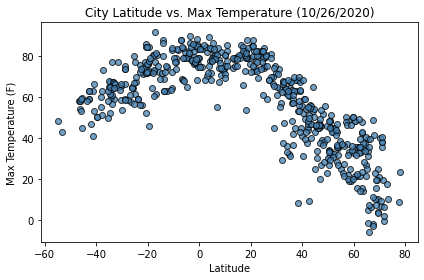

In [39]:
# Set the x and y axis values
x_values = city_weather_df["Lat"]
y_values = city_weather_df["Max Temp"]


# Generate the scatter plot with the linear regression line
plt.scatter(x_values, y_values, facecolors = "steelblue", alpha = .75, edgecolors = "black")

# Set the x and y labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%m/%d/%Y')})")

plt.tight_layout()

plt.savefig("output_data/lat_temp_scatter.png")
plt.show()

## Latitude vs. Humidity Plot

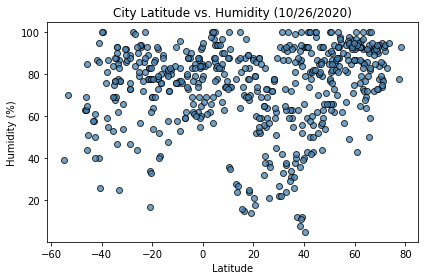

In [40]:
# Set the x and y axis values
x_values = city_weather_df["Lat"]
y_values = city_weather_df["Humidity"]


# Generate the scatter plot with the linear regression line
plt.scatter(x_values, y_values, facecolors = "steelblue", alpha = .75, edgecolors = "black")

# Set the x and y labels
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({time.strftime('%m/%d/%Y')})")

plt.tight_layout()

plt.savefig("output_data/lat_humidity_scatter.png")
plt.show()

## Latitude vs. Cloudiness Plot

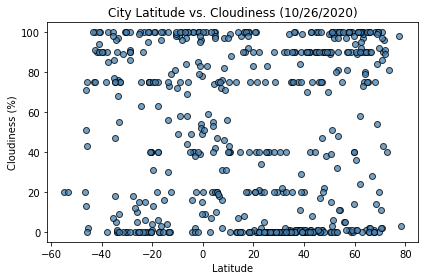

In [41]:
# Set the x and y axis values
x_values = city_weather_df["Lat"]
y_values = city_weather_df["Cloudiness"]


# Generate the scatter plot with the linear regression line
plt.scatter(x_values, y_values, facecolors = "steelblue", alpha = .75, edgecolors = "black")

# Set the x and y labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%m/%d/%Y')})")

plt.tight_layout()

plt.savefig("output_data/lat_cloud_scatter.png")
plt.show()

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression